# What are the main determinants of health insurance costs?

Importing and cleaning the data

In [1]:
# import modules
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv into pandas file
insurance_csv = Path('insurance.csv')
insurance_df = pd.read_csv(insurance_csv)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# check for null values
insurance_df.isnull().values.any()
#insurance_df.dropna()

False

In [4]:
# find duplicates
insurance_df.duplicated().sum()

1

In [5]:
#remove duplicates
insurance_df = insurance_df.drop_duplicates()
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


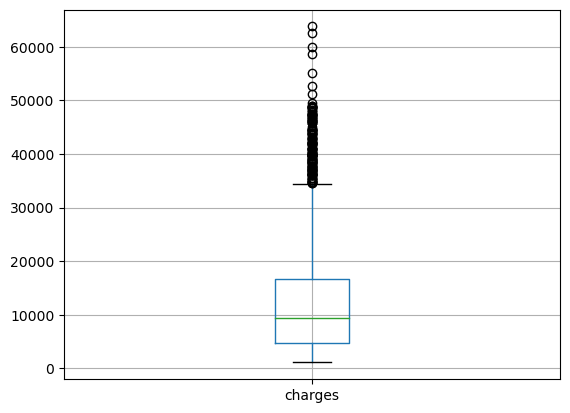

In [6]:
# boxplot of values and outliers
insurance_df.boxplot(column="charges")
plt.savefig("boxplot1.png")
plt.show()

In [7]:
#checking the reasons for the outliers
insurance_high = insurance_df.loc[insurance_df["charges"] >= 35000]
insurance_high

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


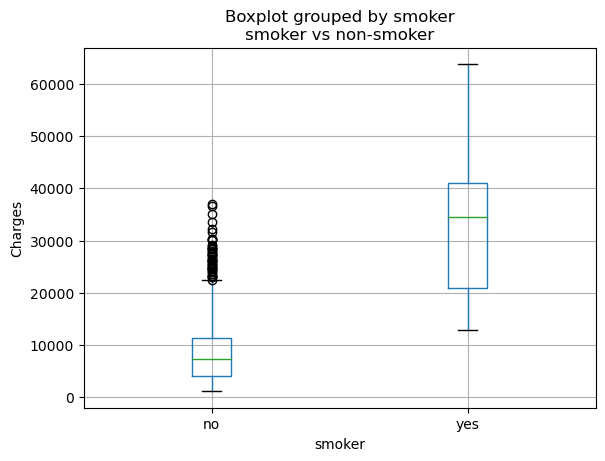

In [7]:
# box plots for smokers and non-smokers
insurance_df.boxplot(column="charges", by="smoker")
plt.xlabel("smoker")
plt.ylabel("Charges")
plt.title("smoker vs non-smoker")
plt.savefig("boxplots2.png")
plt.show()

Descriptive Statistics

In [9]:
# print descriptive statistics 
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


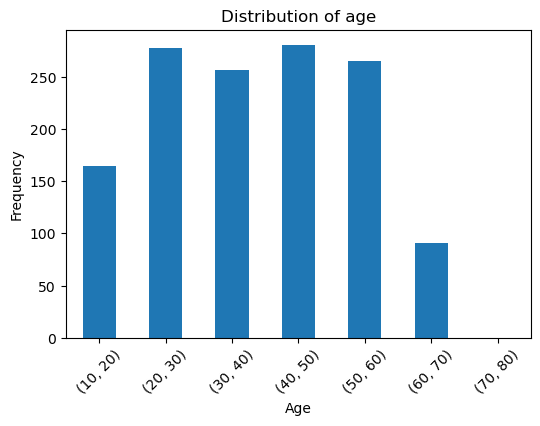

In [8]:
# plot showing distribution of age
age = [10, 20, 30, 40, 50, 60 , 70, 80]
labels = [(10,20), (20,30), (30,40), (40,50), (50,60), (60,70), (70,80)]

insurance_df["age"] = pd.cut(insurance_df["age"], bins=age, labels=labels, include_lowest=True)
age_count=insurance_df["age"].value_counts().sort_index().plot(kind="bar", figsize=(6,4), rot=45)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("bargraph3.png")
plt.show()

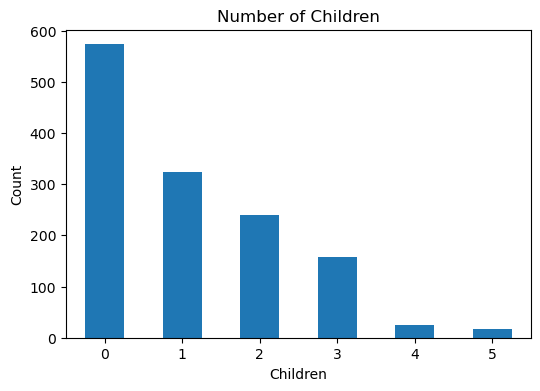

In [9]:
# plot showing number of children bar chart 
children_count=insurance_df["children"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("Number of Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.savefig("bargraph4.png")
plt.show()

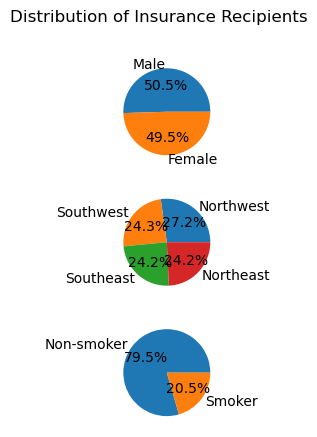

In [10]:
# Distribution of gender, region and smoking habits of Insurance recipients 
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle("Distribution of Insurance Recipients")

categories=["Male","Female"]
gender_count=insurance_df["sex"].value_counts()
ax1.pie(gender_count, labels=categories, autopct='%1.1f%%')

categories=["Northwest","Southwest","Southeast","Northeast"]
region_count= insurance_df["region"].value_counts()
ax2.pie(region_count, labels=categories, autopct='%1.1f%%')

categories=["Non-smoker","Smoker"]
smoker_count=insurance_df["smoker"].value_counts()
ax3.pie(smoker_count, labels=categories, autopct='%1.1f%%')
#plt.subplots_adjust(wspace=0.5)
plt.savefig("pieplot5.png")
plt.show()

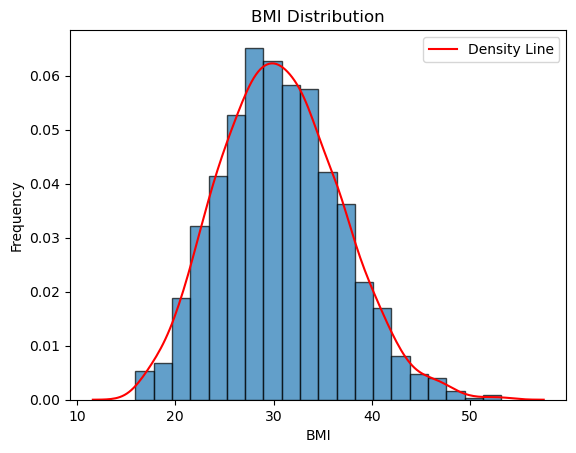

In [11]:
# bmi distribution histogram 
plt.hist(insurance_df["bmi"], bins=20, edgecolor='black', density=True, alpha=0.7)  # Use density=True for the density line
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")

# Add the density line (KDE plot)
sns.kdeplot(insurance_df["bmi"], color="red", label="Density Line")
plt.legend()
plt.savefig("histogram6.png")
plt.show()

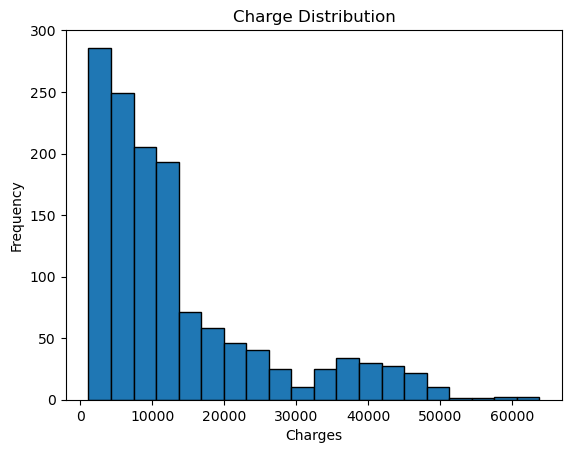

In [12]:
# insurance cost distribution histogram
plt.hist(insurance_df["charges"], bins=20, edgecolor='black')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Charge Distribution")
plt.savefig("histogram7.png")
plt.show()

In [23]:
#groupby gender
gender_groupby = insurance_df.groupby("sex").mean()
gender_groupby


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


In [22]:
#groupby region
region_groupby = insurance_df.groupby("region").mean()
region_groupby


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.259259,29.195494,1.151235,12450.840844
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [21]:
#groupby smokers
smoker_groupby = insurance_df.groupby("smoker").mean()
smoker_groupby

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


In [20]:
#children groupby
children_groupby = insurance_df.groupby("children").mean()
children_groupby

,age,bmi,charges
children,,,
0,38.478185,30.550227,12384.695344
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


Relationships among independent variables

The correlation between bmi and age is 0.11.


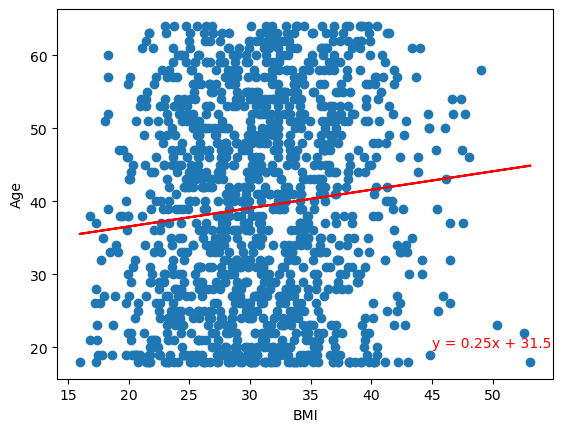

In [9]:
# plot showing correlation between BMI and Age

correlation = st.pearsonr(insurance_df["bmi"], insurance_df["age"])
print(f"The correlation between bmi and age is {round(correlation[0],2)}.")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(insurance_df["bmi"], insurance_df["age"])
pe_fit = pe_slope*(insurance_df["bmi"]) + pe_int
line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))

plt.scatter(insurance_df["bmi"],insurance_df["age"])
plt.plot(insurance_df["bmi"],pe_fit,"-",color="red")
plt.annotate(line_eq, (45,20), fontsize=10, color="red")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.savefig("scatterplot8.png")
plt.show()

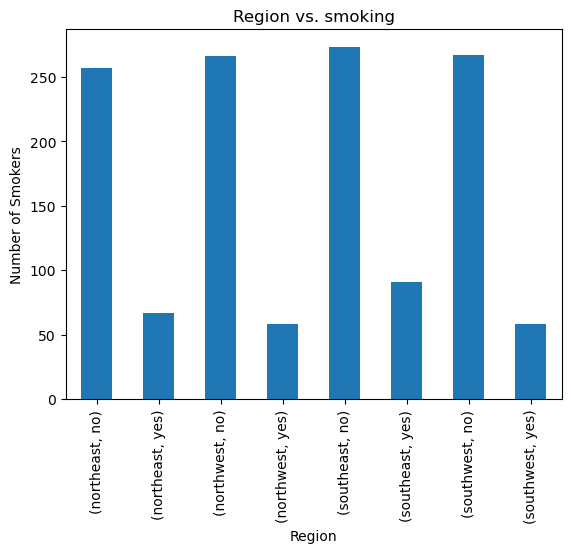

In [10]:
# Plot showing Region Vs Smokers
grouped_df = insurance_df.groupby('region')['smoker'].value_counts()
grouped_df.plot(kind="bar",xlabel="Region", ylabel="Number of Smokers")
plt.title("Region vs. smoking")
plt.xticks(rotation=90)
plt.savefig("barplot9.png")
plt.show()

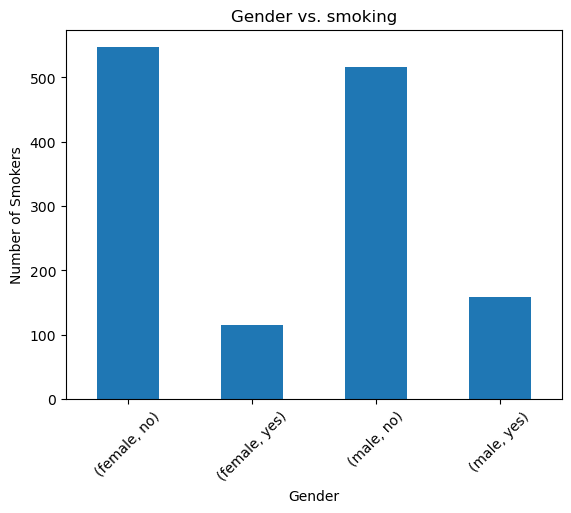

In [11]:
# plot showing Gender Vs Smoking
grouped_df = insurance_df.groupby('sex')['smoker'].value_counts()
grouped_df.plot(kind="bar",xlabel="Gender", ylabel="Number of Smokers")
plt.title("Gender vs. smoking")
plt.xticks(rotation=45)
plt.savefig("barplot10.png")
plt.show()

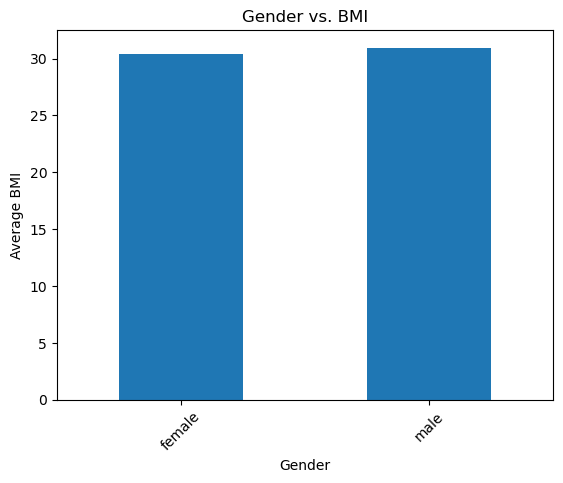

In [12]:
#plot showing Gender Vs BMI
grouped_df = insurance_df.groupby('sex')['bmi'].mean()
grouped_df.plot(kind="bar",xlabel="Gender", ylabel="Average BMI")
plt.title("Gender vs. BMI")
plt.xticks(rotation=45)
plt.savefig("barplot11.png")
plt.show()

Relationships between independent variables and health insurance costs

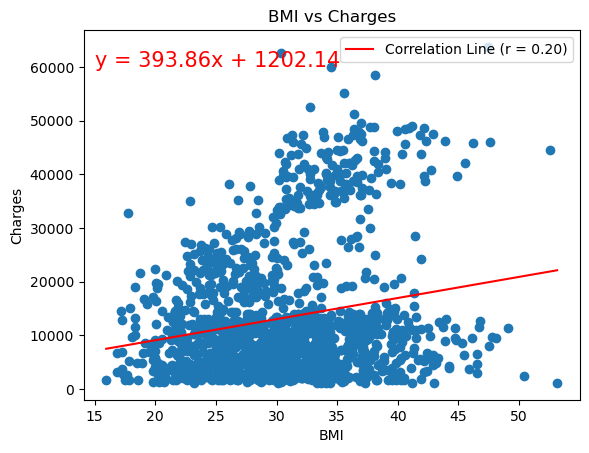

In [13]:
# plot showing correlation between BMI Vs Insurance cost

plt.scatter(insurance_df["bmi"], insurance_df["charges"])

# Calculate correlation coefficient
correlation = np.corrcoef(insurance_df["bmi"], insurance_df["charges"])[0, 1]

# Equation of the correlation line (y = mx + b)
m = correlation * np.std(insurance_df["charges"]) / np.std(insurance_df["bmi"])
b = np.mean(insurance_df["charges"]) - m * np.mean(insurance_df["bmi"])

# Generate the x and y values for the correlation line
x_values = np.linspace(min(insurance_df["bmi"]), max(insurance_df["bmi"]), 100)
y_values = m * x_values + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

# Plot the correlation line
plt.plot(x_values, y_values, color='red', label=f'Correlation Line (r = {correlation:.2f})')
plt.annotate(line_eq, (15,60000), fontsize=15,color="red")

# Labels for the graph
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.legend()
plt.savefig("scatterplot12.png")
plt.show()

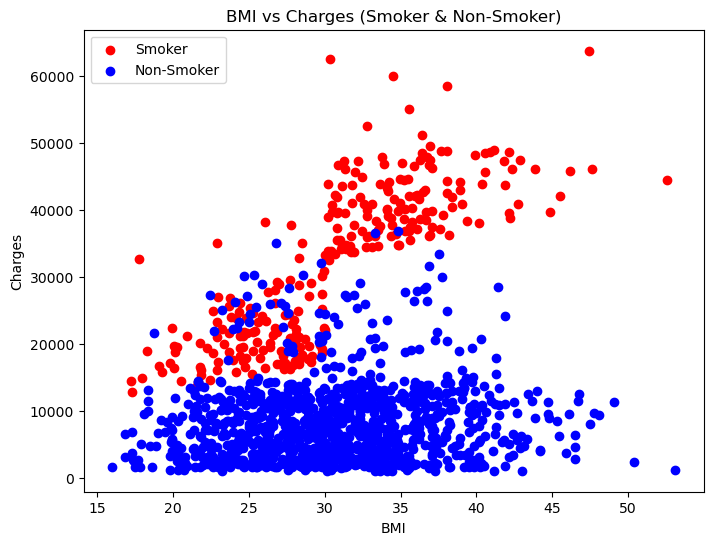

In [14]:
# Plot showing BMI vs. insurance costs for SMOKERS and NON_SMOKERS!!
smoker_data = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker_data = insurance_df[insurance_df["smoker"] == "no"]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(smoker_data["bmi"], smoker_data["charges"], label="Smoker", color="red")
plt.scatter(non_smoker_data["bmi"], non_smoker_data["charges"], label="Non-Smoker", color="blue")

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges (Smoker & Non-Smoker)")
plt.legend()
plt.savefig("scatterplot13.png")
# Show the plot
plt.show()

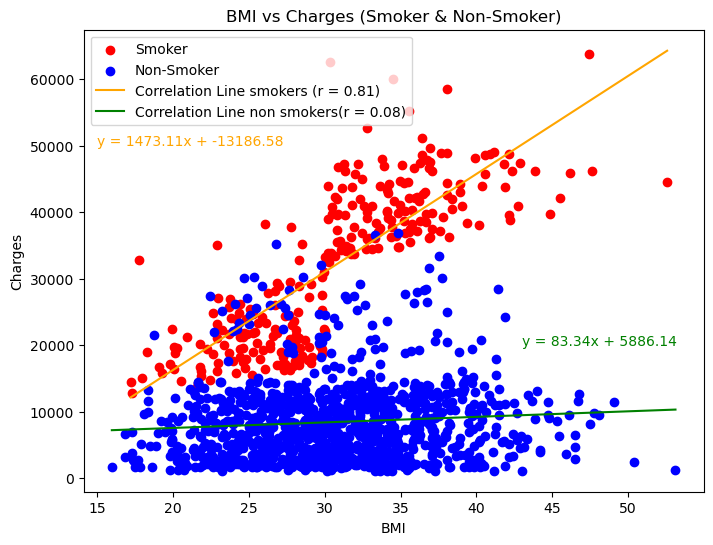

In [15]:
# Plot showing correlation between BMI vs. insurance costs for SMOKERS and NON SMOKERS!!

#FOR SMOKERS
smoker_data = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker_data = insurance_df[insurance_df["smoker"] == "no"]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(smoker_data["bmi"], smoker_data["charges"], label="Smoker", color="red")
plt.scatter(non_smoker_data["bmi"], non_smoker_data["charges"], label="Non-Smoker", color="blue")


correlation = np.corrcoef(smoker_data["bmi"], smoker_data["charges"])[0, 1]

# Equation of the correlation line (y = mx + b)
m = correlation * np.std(smoker_data["charges"]) / np.std(smoker_data["bmi"])
b = np.mean(smoker_data["charges"]) - m * np.mean(smoker_data["bmi"])

# Generate the x and y values for the correlation line
x_values = np.linspace(min(smoker_data["bmi"]), max(smoker_data["bmi"]), 100)
y_values = m * x_values + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

# Plot the correlation line
plt.plot(x_values, y_values, color='orange', label=f'Correlation Line smokers (r = {correlation:.2f})')
plt.annotate(line_eq, (15,50000), fontsize=10, color="orange")

#FOR NON_SMOKERS
correlation = np.corrcoef(non_smoker_data["bmi"], non_smoker_data["charges"])[0, 1]

# Equation of the correlation line (y = mx + b)
m = correlation * np.std(non_smoker_data["charges"]) / np.std(non_smoker_data["bmi"])
b = np.mean(non_smoker_data["charges"]) - m * np.mean(non_smoker_data["bmi"])

# Generate the x and y values for the correlation line
x_values = np.linspace(min(non_smoker_data["bmi"]), max(non_smoker_data["bmi"]), 100)
y_values = m * x_values + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))


# Plot the correlation line
plt.plot(x_values, y_values, color='Green', label=f'Correlation Line non smokers(r = {correlation:.2f})')
plt.annotate(line_eq, (43,20000), fontsize=10, color="green")

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges (Smoker & Non-Smoker)")
plt.legend()
plt.savefig("scatterplot14.png")
# Show the plot
plt.show()

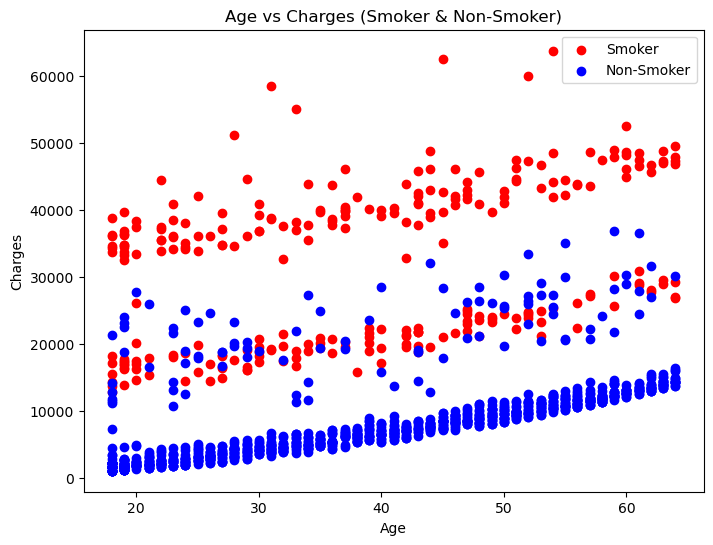

In [16]:
# Plot showing Age vs. insurance costs for SMOKERS and NON_SMOKERS!!
smoker_data = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker_data = insurance_df[insurance_df["smoker"] == "no"]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(smoker_data["age"], smoker_data["charges"], label="Smoker", color="red")
plt.scatter(non_smoker_data["age"], non_smoker_data["charges"], label="Non-Smoker", color="blue")

# Labels for the graph
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges (Smoker & Non-Smoker)")
plt.legend()
plt.savefig("scatterplot15.png")
plt.show()

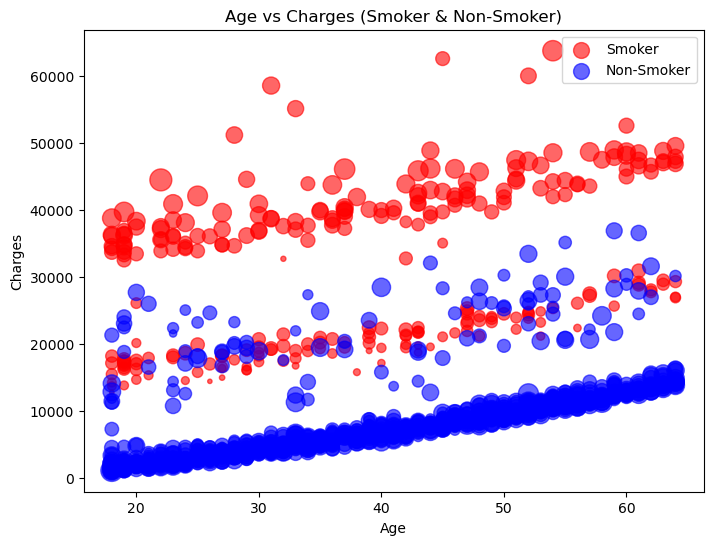

In [17]:
# Plot showing Age vs. insurance costs, taking BMI in account for SMOKERS and NON_SMOKERS!!
smoker_data = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker_data = insurance_df[insurance_df["smoker"] == "no"]

min_size = 10  # Minimum dot size
max_size = 250  # Maximum dot size
normalized_sizes1 = np.interp(smoker_data['bmi'], (smoker_data['bmi'].min(), smoker_data['bmi'].max()), (min_size, max_size))
normalized_sizes2 = np.interp(non_smoker_data['bmi'], (non_smoker_data['bmi'].min(), non_smoker_data['bmi'].max()), (min_size, max_size))

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(smoker_data["age"], smoker_data["charges"], label="Smoker", color="red", s=normalized_sizes1, cmap='viridis', alpha=0.6)
plt.scatter(non_smoker_data["age"], non_smoker_data["charges"], label="Non-Smoker", color="blue", s=normalized_sizes2, cmap='viridis', alpha=0.6)


# Labels for the graph
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges (Smoker & Non-Smoker)")
plt.legend()
plt.savefig("scatterplot16.png")
plt.show()

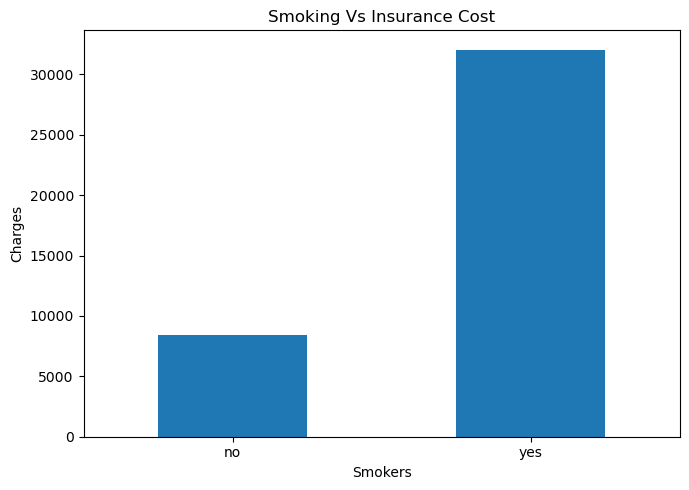

In [18]:
# Plot showing smoking vs. insurance costs
smoker_cost = smoker_groupby["charges"]
smoker_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Smokers")
plt.ylabel("Charges")
plt.title("Smoking Vs Insurance Cost")
plt.tight_layout()
plt.savefig("bar17.png")
plt.show()

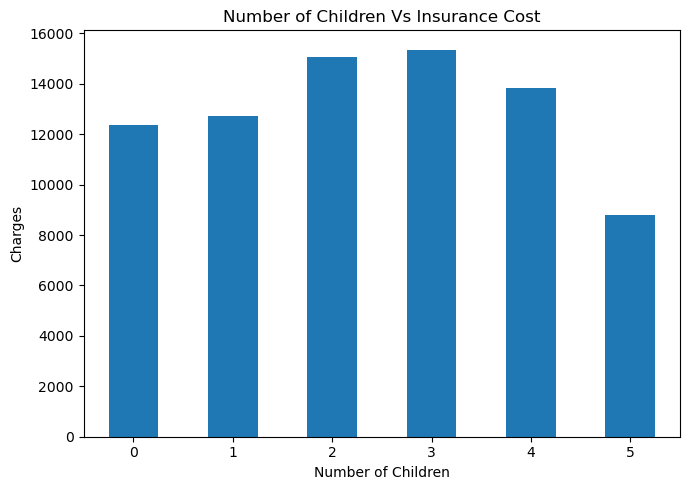

In [24]:
# Plot showing Number of children vs. insurance costs
children_cost = children_groupby["charges"]
children_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Number of Children Vs Insurance Cost")
plt.tight_layout()
plt.savefig("bar18.png")
plt.show()

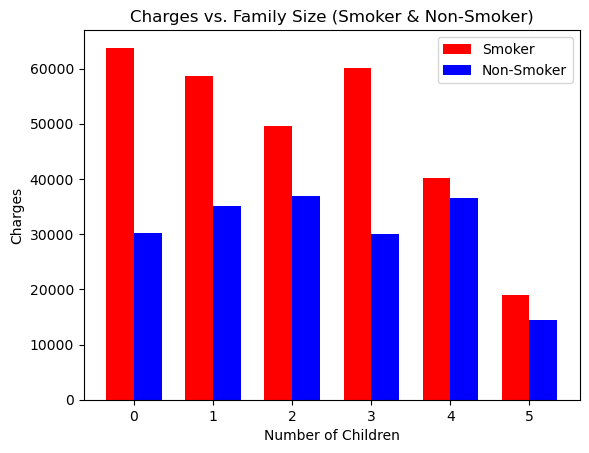

In [25]:
# Plot showing Number of children vs. insurance costs (Smokers and Non-Smokers)

# Separate smoker and non-smoker data
smoker_data = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker_data = insurance_df[insurance_df["smoker"] == "no"]

# Create the side-by-side bar plot
bar_width = 0.35
x1 = smoker_data["children"] - bar_width/2
x2 = non_smoker_data["children"] + bar_width/2

plt.bar(x1, smoker_data["charges"], label="Smoker", color="red", width=bar_width)
plt.bar(x2, non_smoker_data["charges"], label="Non-Smoker", color="blue", width=bar_width)

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Charges vs. Family Size (Smoker & Non-Smoker)")
plt.legend()
plt.savefig("bar19.png")
# Show the plot
plt.show()

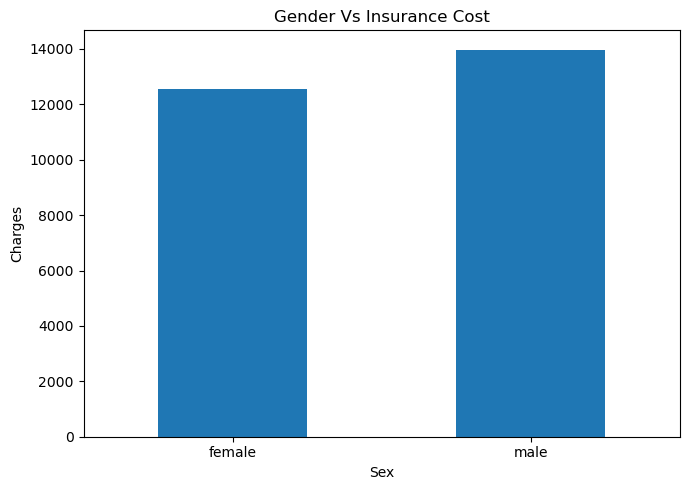

In [26]:
# Plot showing Gender vs. insurance costs

gender_cost = gender_groupby["charges"]
gender_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Gender Vs Insurance Cost")
plt.tight_layout()
plt.savefig("bar20.png")
plt.show()

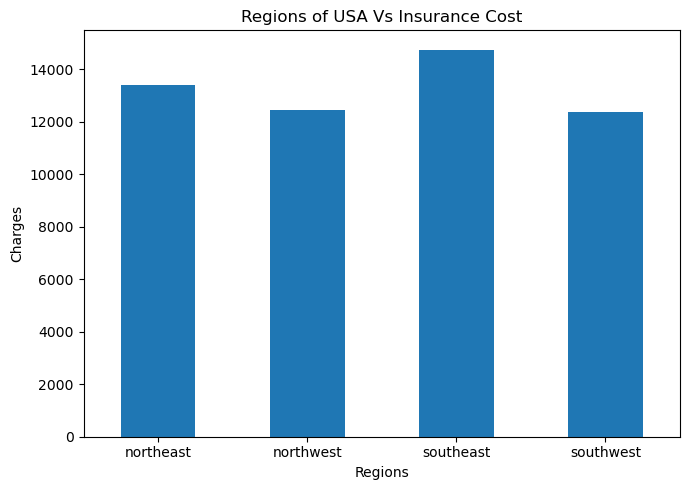

In [27]:
# Plot showing Region of the country Vs Charges
region_cost = region_groupby["charges"]
region_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Regions")
plt.ylabel("Charges")
plt.title("Regions of USA Vs Insurance Cost")
plt.tight_layout()
plt.savefig("bar21.png")
plt.show()